# Lyft - Baywheels Data Exploration
## by Gautam Gadiyar

## Introduction
> The Lyft - Baywheels is a Bike sharing company that rents out bikes to customers who may hire a bike from any nearest point. It was a partnership program with Metropolitan Transportation Commission in order to motiate people to use envireonnment friendly means of transport. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system was re-launched as Ford GoBike in a partnership with Ford Motor Company.<br>
After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.The system provides bikes 24/7 to customers at nominal costs. The customers have access to all the bikes once they are a member or have a pass for themselves.

## Preliminary Wrangling

Firstly, the data that has been obtained from the Lyft site has to be checked for any anomalies. The data has to be cleaned and then we can start with the visualizations.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import glob
from math import radians, sin, cos, acos, atan2, sqrt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
path = './Datasets'
all_files = glob.glob(path + "/*.csv")

files_list = []
for each_file in all_files:
    df = pd.read_csv(each_file, index_col=None, header=0, low_memory=0)
    files_list.append(df)

master_df = pd.concat(files_list, axis=0, ignore_index=True, sort=False)

In [3]:
master_df.to_csv('baywheels_master.csv')

In [3]:
master_df = pd.read_csv("/home/gautam/Documents/Udacity/Communicate_Data_Findings/Datasets/201906-baywheels-tripdata.csv", low_memory=False)
master_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,rental_access_method
0,81695,2019-06-30 18:16:09.7730,2019-07-01 16:57:45.5920,109.0,17th St at Valencia St,37.763316,-122.421904,56.0,Koshland Park,37.773414,-122.427317,1502,Subscriber,1957.0,Male,No,NaN
1,74260,2019-06-30 18:09:55.8300,2019-07-01 14:47:36.6810,50.0,2nd St at Townsend St,37.780526,-122.390288,101.0,15th St at Potrero Ave,37.767079,-122.407359,2526,Customer,NaN,NaN,No,NaN
2,59603,2019-06-30 15:40:31.0380,2019-07-01 08:13:54.3490,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2427,Subscriber,1985.0,Male,No,NaN
3,67932,2019-06-30 12:49:47.7810,2019-07-01 07:42:00.5430,169.0,Bushrod Park,37.846516,-122.265304,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,1261,Customer,NaN,NaN,No,NaN
4,48894,2019-06-30 17:21:00.0550,2019-07-01 06:55:54.9960,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1070,Customer,NaN,NaN,No,NaN


In [4]:
master_df.shape

(191772, 17)

In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191772 entries, 0 to 191771
Data columns (total 17 columns):
duration_sec               191772 non-null int64
start_time                 191772 non-null object
end_time                   191772 non-null object
start_station_id           189612 non-null float64
start_station_name         189612 non-null object
start_station_latitude     191772 non-null float64
start_station_longitude    191772 non-null float64
end_station_id             189510 non-null float64
end_station_name           189510 non-null object
end_station_latitude       191772 non-null float64
end_station_longitude      191772 non-null float64
bike_id                    191772 non-null int64
user_type                  191772 non-null object
member_birth_year          172635 non-null float64
member_gender              172853 non-null object
bike_share_for_all_trip    187879 non-null object
rental_access_method       3893 non-null object
dtypes: float64(7), int64(2), object

The start and end times are not in datetime format. This needs a change.

We can notice that there are a lot of missing values in 'rental_access_method'. So we can drop the column.

In [6]:
master_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,191772.000000,189612.000000,191772.000000,191772.000000,189510.000000,191772.000000,191772.000000,191772.000000,172635.000000
mean,841.814608,139.909505,37.762560,-122.348320,137.484645,37.762698,-122.347756,10641.887439,1984.842378
std,1936.720801,118.054453,0.112639,0.169730,117.447948,0.112538,0.169336,68253.875020,10.186821
min,60.000000,3.000000,37.290060,-122.453704,3.000000,37.255975,-122.453704,12.000000,1896.000000
25%,375.000000,44.000000,37.769305,-122.411738,43.000000,37.770030,-122.411306,1028.000000,1980.000000
50%,596.000000,98.000000,37.780526,-122.398113,96.000000,37.780526,-122.397086,1937.500000,1987.000000
75%,925.000000,226.000000,37.795392,-122.293400,220.000000,37.795392,-122.293528,2975.000000,1992.000000
max,85952.000000,443.000000,45.510000,-73.570000,443.000000,45.510000,-73.570000,985110.000000,2001.000000


The birth year of some users seem to be wrong. For example, 1896 might be a wrong birth year. The user can't be more than a 100 years of age!

In [7]:
rental_access = master_df[master_df.rental_access_method.notnull()].rental_access_method.value_counts()

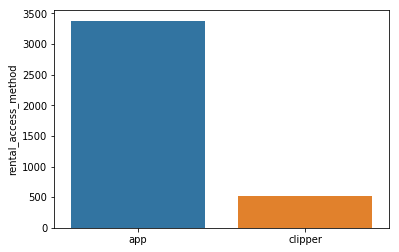

In [8]:
sb.barplot(rental_access.index, rental_access);

Of the 3893 records that we have for rental_access_method, it seems most of the bookings came via the app. But since the number is less compared to the total records that we have, it might not be the right result.

In [9]:
master_df.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id             2160
start_station_name           2160
start_station_latitude          0
start_station_longitude         0
end_station_id               2262
end_station_name             2262
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year           19137
member_gender               18919
bike_share_for_all_trip      3893
rental_access_method       187879
dtype: int64

The missing values of age and gender is a lot. Rental access method is a lot more missing. So we can drop the column.

In [10]:
master_df.duplicated().sum()

0

There are no duplicates! Nice!

## Data Cleaning

There seems to be a few quality issues with the data. The following are a few:
1. The start/end time should be in timestamp datatype. Birth year should be in integer
2. The gender, user_type, bike-share-for-all can be categorical data
3. Birth years might be wrong, since some users are more than 100 years of age.
4. The latitudes and longitudes are not readable by users. Need to calculate the distance travelled.
5. Delete the rental access method

In [11]:
master_cleaned = master_df.copy()

**The start/end time should be in timestamp datatype.**

**Code:**

In [12]:
master_cleaned.start_time = pd.to_datetime(master_cleaned.start_time)
master_cleaned.end_time = pd.to_datetime(master_cleaned.end_time)

In [13]:
master_cleaned.bike_id = master_cleaned.bike_id.astype(str)

In [14]:
master_cleaned.start_station_id = master_cleaned.start_station_id.astype(str)
master_cleaned.end_station_id = master_cleaned.end_station_id.astype(str)

**Test**

In [15]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191772 entries, 0 to 191771
Data columns (total 17 columns):
duration_sec               191772 non-null int64
start_time                 191772 non-null datetime64[ns]
end_time                   191772 non-null datetime64[ns]
start_station_id           191772 non-null object
start_station_name         189612 non-null object
start_station_latitude     191772 non-null float64
start_station_longitude    191772 non-null float64
end_station_id             191772 non-null object
end_station_name           189510 non-null object
end_station_latitude       191772 non-null float64
end_station_longitude      191772 non-null float64
bike_id                    191772 non-null object
user_type                  191772 non-null object
member_birth_year          172635 non-null float64
member_gender              172853 non-null object
bike_share_for_all_trip    187879 non-null object
rental_access_method       3893 non-null object
dtypes: datetime64[ns

In [16]:
master_cleaned.start_station_id.value_counts().head(20)

67.0    4832
15.0    3684
81.0    3672
58.0    3653
21.0    3036
3.0     2862
16.0    2662
5.0     2591
6.0     2568
22.0    2496
50.0    2266
nan     2160
66.0    2156
90.0    1945
27.0    1892
30.0    1825
44.0    1781
17.0    1767
93.0    1760
23.0    1704
Name: start_station_id, dtype: int64

**The gender, user_type, bike-share-for-all can be categorical data**

**Code:**

In [17]:
master_cleaned.member_gender = master_cleaned.member_gender.astype('category')
master_cleaned.user_type = master_cleaned.user_type.astype('category')
master_cleaned.bike_share_for_all_trip = master_cleaned.bike_share_for_all_trip.astype('category')

In [18]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191772 entries, 0 to 191771
Data columns (total 17 columns):
duration_sec               191772 non-null int64
start_time                 191772 non-null datetime64[ns]
end_time                   191772 non-null datetime64[ns]
start_station_id           191772 non-null object
start_station_name         189612 non-null object
start_station_latitude     191772 non-null float64
start_station_longitude    191772 non-null float64
end_station_id             191772 non-null object
end_station_name           189510 non-null object
end_station_latitude       191772 non-null float64
end_station_longitude      191772 non-null float64
bike_id                    191772 non-null object
user_type                  191772 non-null category
member_birth_year          172635 non-null float64
member_gender              172853 non-null category
bike_share_for_all_trip    187879 non-null category
rental_access_method       3893 non-null object
dtypes: categor

**Birth years might be wrong, since some users are more than 100 years of age.**

In [19]:
master_cleaned['member_age'] = datetime.datetime.now().year - master_cleaned.member_birth_year

In [20]:
age_less_than_60 = len(master_cleaned.query('member_age < 70'))
age_less_than_60*100/1176326

14.623072175570378

In [21]:
master_cleaned[['member_birth_year', 'member_age']].head()

,member_birth_year,member_age
0,1957.0,62.0
1,NaN,NaN
2,1985.0,34.0
3,NaN,NaN
4,NaN,NaN


Text(0.5, 0, 'Age')

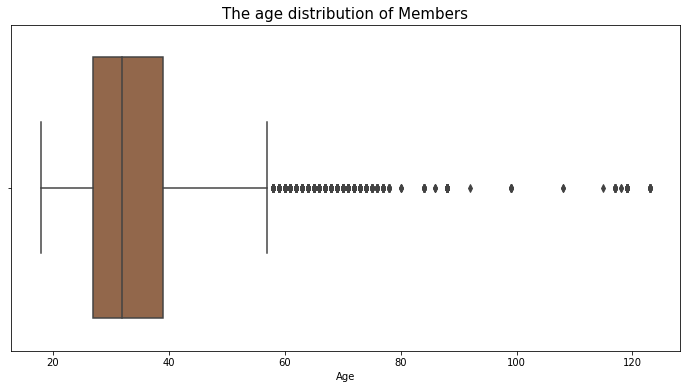

In [22]:
plt.figure(figsize=(12,6))
sb.boxplot(x='member_age', data=master_cleaned, palette='copper', orient='h')
plt.title("The age distribution of Members", fontsize=15)
plt.xlabel("Age")

Since most of the users are below the age of 70, we can forget the rest of the data.

In [23]:
master_cleaned[master_cleaned.member_age > 70] = None

**Test:**

Text(0.5, 0, 'Age')

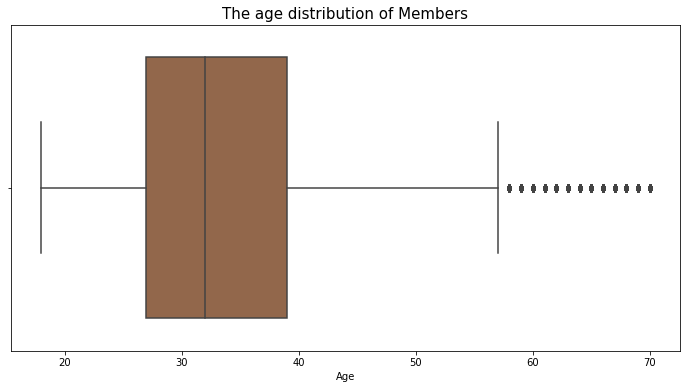

In [24]:
plt.figure(figsize=(12,6))
sb.boxplot(x='member_age', data=master_cleaned, palette='copper', orient='h')
plt.title("The age distribution of Members", fontsize=15)
plt.xlabel("Age")

**The latitudes and longitudes are not readable by users. Need to calculate the distance travelled.*

**Code:**<br>
Let us start by creating a function that gives the distance in kilometers

In [25]:
# function to calculate the distance from coordinates
def calculate_distance(latitude1, latitude2, longitude1, longitude2):
    # approximate radius of earth in km
    R = 6373.0
    
    try:
        lat1 = radians(latitude1)
        lon1 = radians(longitude1)
        lat2 = radians(latitude2)
        lon2 = radians(longitude2)
    #coversion to radians
    except:
        # if the coordinates are Null
        return None

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    #difference in the coordinates 

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [26]:
master_cleaned['distance_travelled'] = master_cleaned.apply(lambda x: calculate_distance(x['start_station_latitude'],
                                                                                        x['end_station_latitude'],
                                                                                        x['start_station_longitude'],
                                                                                        x['end_station_longitude']),axis=1)

In [27]:
master_cleaned.describe()['distance_travelled']

count    191232.000000
mean          1.672589
std           1.055953
min           0.000000
25%           0.929520
50%           1.441241
75%           2.187356
max          13.647852
Name: distance_travelled, dtype: float64

In [28]:
master_cleaned = master_cleaned.round({'distance_travelled':3})
master_cleaned.describe().distance_travelled

count    191232.000000
mean          1.672584
std           1.055953
min           0.000000
25%           0.930000
50%           1.441000
75%           2.187000
max          13.648000
Name: distance_travelled, dtype: float64

Now we can see that the distance was mostly less. The distance is calculated in kilometers

**Delete the rental access method**<br>

**Code:**

In [29]:
master_cleaned.drop('rental_access_method', axis=1, inplace=True)

**Test:**

In [30]:
master_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191772 entries, 0 to 191771
Data columns (total 18 columns):
duration_sec               191232 non-null float64
start_time                 191232 non-null datetime64[ns]
end_time                   191232 non-null datetime64[ns]
start_station_id           191232 non-null object
start_station_name         189072 non-null object
start_station_latitude     191232 non-null float64
start_station_longitude    191232 non-null float64
end_station_id             191232 non-null object
end_station_name           188970 non-null object
end_station_latitude       191232 non-null float64
end_station_longitude      191232 non-null float64
bike_id                    191232 non-null object
user_type                  191232 non-null category
member_birth_year          172095 non-null float64
member_gender              172313 non-null category
bike_share_for_all_trip    187339 non-null category
member_age                 172095 non-null float64
distance_t

**Store dataframe in new csv**

In [31]:
master_cleaned.to_csv('baywheel_data_updated.csv', index=False)

### What is the structure of your dataset?

The dataset is a collection user rides data that provided the distance, time, station data with most of the data being clean. There are 191772 records dated for June 2019. This gives a very clear insight to the trends. Most values are numeric in the dataset.

The following are the features present:
1. Duration in seconds
2. Start time              
3. End_time                   
4. Start_station_id           
5. Start_station_name         
6. Start_station_latitude     
7. Start_station_longitude    
8. End_station_id             
9. End_station_name           
10. End_station_latitude       
11. End_station_longitude      
12. Bike_id                    
13. User_type                  
14. Member_birth_year          
15. Member_gender              
16. Bike_share_for_all_trip    
17. Member_age                 
18. Distance_travelled

### What is/are the main feature(s) of interest in your dataset?

Some of the interesting features to look out for are:
1. What age group is most prevalent in using the service.
2. What is the most popular station and the popular destination.
3. Does the distance travelled increase/decrease with age?
4. Is the Bike share for all program taking off well?
5. Is it the members or the casual customers that are using the service more

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Any data that is part of the distance, station, user related fields and time will help in getting the insights. The data 

## Univariate Exploration


**Let's see how long do rides last**

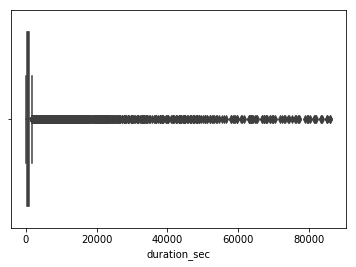

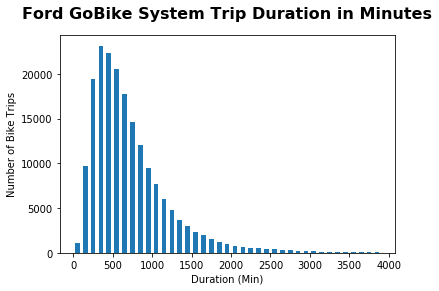

In [41]:

# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 4000, 100)
ticks = [0, 100, 200, 300, 400, 500, 550,  600, 650,700,750,800]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = master_cleaned, x = 'duration_sec', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
#plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!